In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),10)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(10):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [19]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(10 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

1

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1298
number of class2:319

 ****** Running generation 0 ****** 

Population's average fitness: 0.42638 stdev: 0.20688
Best fitness: 0.82127 - size: (2, 13) - species 2 - id 186
Average adjusted fitness: 0.269
Mean genetic distance 2.893, standard deviation 0.516
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 4.888 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61233 stdev: 0.19957
Best fitness: 0.82127 - size: (2, 13) - species 4 - id 186
Average adjusted fitness: 0.410
Mean genetic distance 2.957, standard deviation 0.488
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 4.944 sec (4.916 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63440 stdev: 0.19391
Best fitness: 0.82127 - size: (2, 13) - species 4 - id 186
Average adjusted fitness: 0.426
Mean genetic distance 3.056, standard deviation 0.483
Population of 197 members in 30 species
Total extincti


Population's average fitness: 0.68836 stdev: 0.18586
Best fitness: 0.84477 - size: (3, 14) - species 25 - id 689
Average adjusted fitness: 0.464
Mean genetic distance 3.210, standard deviation 0.586
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 6.284 sec (6.120 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.70297 stdev: 0.16911
Best fitness: 0.84477 - size: (3, 14) - species 25 - id 689
Average adjusted fitness: 0.484
Mean genetic distance 3.220, standard deviation 0.585
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 6.211 sec (6.154 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.70088 stdev: 0.17156
Best fitness: 0.84477 - size: (3, 14) - species 25 - id 689
Average adjusted fitness: 0.488
Mean genetic distance 3.208, standard deviation 0.604
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 6.474 sec (6.220 average)

 ****** R

Population's average fitness: 0.71417 stdev: 0.16088
Best fitness: 0.84972 - size: (10, 26) - species 39 - id 6832
Average adjusted fitness: 0.517
Mean genetic distance 3.161, standard deviation 0.616
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 7.876 sec (7.765 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.70350 stdev: 0.16762
Best fitness: 0.84972 - size: (11, 29) - species 39 - id 7504
Average adjusted fitness: 0.507
Mean genetic distance 3.124, standard deviation 0.611
Population of 206 members in 16 species
Total extinctions: 0
Generation time: 8.103 sec (7.826 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.69862 stdev: 0.17378
Best fitness: 0.84972 - size: (10, 26) - species 39 - id 6832
Average adjusted fitness: 0.500
Mean genetic distance 3.133, standard deviation 0.610
Population of 206 members in 16 species
Total extinctions: 0
Generation time: 8.655 sec (7.837 average)

 ***

Population's average fitness: 0.70200 stdev: 0.17909
Best fitness: 0.86889 - size: (11, 31) - species 20 - id 11639
Average adjusted fitness: 0.496
Mean genetic distance 3.272, standard deviation 0.578
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 9.092 sec (8.806 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.68529 stdev: 0.18103
Best fitness: 0.86889 - size: (11, 31) - species 20 - id 11639
Average adjusted fitness: 0.483
Mean genetic distance 3.245, standard deviation 0.584
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 9.065 sec (8.864 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.70348 stdev: 0.17533
Best fitness: 0.86889 - size: (11, 31) - species 20 - id 11639
Average adjusted fitness: 0.509
Mean genetic distance 3.236, standard deviation 0.605
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 9.193 sec (8.935 average)

 

Population's average fitness: 0.71894 stdev: 0.16246
Best fitness: 0.87755 - size: (12, 30) - species 62 - id 13821
Average adjusted fitness: 0.490
Mean genetic distance 3.092, standard deviation 0.597
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 9.361 sec (9.161 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.68255 stdev: 0.18936
Best fitness: 0.87755 - size: (12, 30) - species 62 - id 13821
Average adjusted fitness: 0.474
Mean genetic distance 3.108, standard deviation 0.577
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 9.720 sec (9.249 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.71473 stdev: 0.16968
Best fitness: 0.87755 - size: (12, 30) - species 62 - id 13821
Average adjusted fitness: 0.502
Mean genetic distance 3.103, standard deviation 0.592
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 9.503 sec (9.286 average)

 

Population's average fitness: 0.69741 stdev: 0.17689
Best fitness: 0.87817 - size: (12, 31) - species 62 - id 18381
Average adjusted fitness: 0.501
Mean genetic distance 3.114, standard deviation 0.589
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 10.973 sec (10.719 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.71973 stdev: 0.16980
Best fitness: 0.87817 - size: (12, 31) - species 62 - id 18381
Average adjusted fitness: 0.522
Mean genetic distance 3.162, standard deviation 0.572
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 11.518 sec (10.825 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.69228 stdev: 0.18856
Best fitness: 0.87817 - size: (12, 31) - species 62 - id 18381
Average adjusted fitness: 0.497
Mean genetic distance 3.154, standard deviation 0.564
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 11.275 sec (10.914 ave

Population's average fitness: 0.70807 stdev: 0.17330
Best fitness: 0.87817 - size: (12, 31) - species 62 - id 18381
Average adjusted fitness: 0.508
Mean genetic distance 3.012, standard deviation 0.581
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 11.063 sec (11.357 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.68479 stdev: 0.18939
Best fitness: 0.87817 - size: (12, 31) - species 62 - id 18381
Average adjusted fitness: 0.489
Mean genetic distance 3.031, standard deviation 0.567
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 11.342 sec (11.321 average)

 ****** Running generation 147 ****** 

Population's average fitness: 0.69355 stdev: 0.19059
Best fitness: 0.87817 - size: (12, 31) - species 62 - id 18381
Average adjusted fitness: 0.496
Mean genetic distance 3.041, standard deviation 0.544
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 11.041 sec (11.192 ave


 ****** Running generation 19 ****** 

Population's average fitness: 0.78329 stdev: 0.20650
Best fitness: 0.90847 - size: (2, 13) - species 8 - id 94
Average adjusted fitness: 0.680
Mean genetic distance 3.123, standard deviation 0.538
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.266 sec (6.224 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.79474 stdev: 0.19278
Best fitness: 0.90847 - size: (2, 13) - species 8 - id 94
Average adjusted fitness: 0.698
Mean genetic distance 3.100, standard deviation 0.550
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 6.384 sec (6.250 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.77375 stdev: 0.20892
Best fitness: 0.90847 - size: (2, 13) - species 8 - id 94
Average adjusted fitness: 0.679
Mean genetic distance 3.072, standard deviation 0.563
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 6.2

Population of 202 members in 24 species
Total extinctions: 0
Generation time: 7.085 sec (6.844 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.78300 stdev: 0.22387
Best fitness: 0.92022 - size: (6, 24) - species 47 - id 6660
Average adjusted fitness: 0.653
Mean genetic distance 3.162, standard deviation 0.559
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 7.206 sec (6.908 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.76280 stdev: 0.23704
Best fitness: 0.92826 - size: (7, 26) - species 47 - id 7129
Average adjusted fitness: 0.632
Mean genetic distance 3.152, standard deviation 0.542
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 7.212 sec (6.964 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.74723 stdev: 0.24572
Best fitness: 0.92826 - size: (7, 26) - species 47 - id 7129
Average adjusted fitness: 0.626
Mean genetic distance 

Mean genetic distance 3.210, standard deviation 0.581
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 8.920 sec (8.267 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.79117 stdev: 0.19973
Best fitness: 0.92826 - size: (7, 26) - species 47 - id 7129
Average adjusted fitness: 0.688
Mean genetic distance 3.215, standard deviation 0.562
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 9.210 sec (8.373 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.79761 stdev: 0.18434
Best fitness: 0.92826 - size: (7, 26) - species 47 - id 7129
Average adjusted fitness: 0.701
Mean genetic distance 3.218, standard deviation 0.556
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 8.920 sec (8.455 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.78168 stdev: 0.22321
Best fitness: 0.92826 - size: (7, 26) - species 47 - id 7129


Mean genetic distance 3.314, standard deviation 0.634
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 9.693 sec (9.538 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.72163 stdev: 0.26735
Best fitness: 0.93321 - size: (13, 34) - species 57 - id 12892
Average adjusted fitness: 0.570
Mean genetic distance 3.308, standard deviation 0.651
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 9.568 sec (9.585 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.73501 stdev: 0.26355
Best fitness: 0.93321 - size: (13, 34) - species 57 - id 12892
Average adjusted fitness: 0.591
Mean genetic distance 3.327, standard deviation 0.656
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 9.627 sec (9.601 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.74937 stdev: 0.24446
Best fitness: 0.93321 - size: (13, 34) - species 57 - id 

Mean genetic distance 3.226, standard deviation 0.588
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 10.280 sec (10.037 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.77433 stdev: 0.24599
Best fitness: 0.94063 - size: (14, 39) - species 74 - id 18852
Average adjusted fitness: 0.644
Mean genetic distance 3.203, standard deviation 0.591
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 10.079 sec (10.037 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.80174 stdev: 0.20562
Best fitness: 0.94063 - size: (14, 39) - species 74 - id 18852
Average adjusted fitness: 0.694
Mean genetic distance 3.185, standard deviation 0.603
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 10.578 sec (10.113 average)

 ****** Running generation 118 ****** 

Population's average fitness: 0.71408 stdev: 0.27454
Best fitness: 0.94063 - size: (14, 39) - species

Population's average fitness: 0.78441 stdev: 0.22205
Best fitness: 0.94249 - size: (14, 35) - species 96 - id 21499
Average adjusted fitness: 0.687
Mean genetic distance 3.179, standard deviation 0.531
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 10.161 sec (10.711 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.79304 stdev: 0.20986
Best fitness: 0.94249 - size: (14, 35) - species 96 - id 21499
Average adjusted fitness: 0.684
Mean genetic distance 3.182, standard deviation 0.544
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 10.188 sec (10.582 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.77952 stdev: 0.22532
Best fitness: 0.94249 - size: (14, 35) - species 96 - id 21499
Average adjusted fitness: 0.682
Mean genetic distance 3.165, standard deviation 0.548
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 10.017 sec (10.523 ave

Population's average fitness: 0.59913 stdev: 0.08320
Best fitness: 0.74273 - size: (5, 18) - species 23 - id 1898
Average adjusted fitness: 0.236
Mean genetic distance 3.276, standard deviation 0.458
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 6.342 sec (6.320 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59839 stdev: 0.07638
Best fitness: 0.74273 - size: (5, 18) - species 23 - id 1898
Average adjusted fitness: 0.159
Mean genetic distance 3.274, standard deviation 0.462
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 6.714 sec (6.382 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60472 stdev: 0.07639
Best fitness: 0.74273 - size: (5, 18) - species 23 - id 1898
Average adjusted fitness: 0.218
Mean genetic distance 3.287, standard deviation 0.454
Population of 203 members in 48 species
Total extinctions: 0
Generation time: 6.669 sec (6.450 average)

 ******

Mean genetic distance 3.347, standard deviation 0.495
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 7.848 sec (7.602 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.61727 stdev: 0.08113
Best fitness: 0.75448 - size: (6, 20) - species 23 - id 4978
Average adjusted fitness: 0.149
Mean genetic distance 3.372, standard deviation 0.506
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 7.918 sec (7.647 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.62073 stdev: 0.07997
Best fitness: 0.75572 - size: (7, 22) - species 30 - id 5112
Average adjusted fitness: 0.220
Mean genetic distance 3.397, standard deviation 0.499
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 8.416 sec (7.745 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.61614 stdev: 0.08369
Best fitness: 0.75572 - size: (7, 22) - species 30 - id 5112


Population of 198 members in 19 species
Total extinctions: 0
Generation time: 9.192 sec (8.644 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.61169 stdev: 0.08750
Best fitness: 0.76500 - size: (7, 23) - species 23 - id 5832
Average adjusted fitness: 0.249
Mean genetic distance 3.398, standard deviation 0.539
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 8.883 sec (8.686 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.61349 stdev: 0.08929
Best fitness: 0.76500 - size: (7, 23) - species 23 - id 5832
Average adjusted fitness: 0.196
Mean genetic distance 3.375, standard deviation 0.549
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 8.650 sec (8.696 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.62558 stdev: 0.08409
Best fitness: 0.76500 - size: (7, 23) - species 23 - id 5832
Average adjusted fitness: 0.187
Mean genetic distance 

Mean genetic distance 3.314, standard deviation 0.571
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 9.445 sec (9.123 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.62881 stdev: 0.09358
Best fitness: 0.78108 - size: (14, 40) - species 61 - id 12468
Average adjusted fitness: 0.216
Mean genetic distance 3.306, standard deviation 0.539
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 9.147 sec (9.090 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.62558 stdev: 0.08950
Best fitness: 0.78108 - size: (14, 40) - species 61 - id 12468
Average adjusted fitness: 0.184
Mean genetic distance 3.298, standard deviation 0.558
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 9.179 sec (9.056 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.62470 stdev: 0.08985
Best fitness: 0.78108 - size: (14, 40) - species 61 - id 

Mean genetic distance 3.310, standard deviation 0.620
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 9.993 sec (10.028 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.61414 stdev: 0.09436
Best fitness: 0.78108 - size: (14, 40) - species 61 - id 12468
Average adjusted fitness: 0.216
Mean genetic distance 3.276, standard deviation 0.619
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 9.842 sec (9.997 average)

 ****** Running generation 111 ****** 

Population's average fitness: 0.62865 stdev: 0.08553
Best fitness: 0.78108 - size: (14, 40) - species 61 - id 12468
Average adjusted fitness: 0.221
Mean genetic distance 3.251, standard deviation 0.614
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 9.689 sec (9.997 average)

 ****** Running generation 112 ****** 

Population's average fitness: 0.63221 stdev: 0.09539
Best fitness: 0.78108 - size: (14, 40) - species 61 -

Population's average fitness: 0.65235 stdev: 0.08303
Best fitness: 0.78108 - size: (14, 40) - species 61 - id 12468
Average adjusted fitness: 0.243
Mean genetic distance 3.282, standard deviation 0.675
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 12.026 sec (11.620 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.63342 stdev: 0.09465
Best fitness: 0.78108 - size: (14, 40) - species 61 - id 12468
Average adjusted fitness: 0.238
Mean genetic distance 3.285, standard deviation 0.636
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 12.110 sec (11.715 average)

 ****** Running generation 135 ****** 

Population's average fitness: 0.63204 stdev: 0.09368
Best fitness: 0.78108 - size: (14, 40) - species 61 - id 12468
Average adjusted fitness: 0.208
Mean genetic distance 3.287, standard deviation 0.609
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 12.764 sec (11.836 ave


 ****** Running generation 7 ****** 

Population's average fitness: 0.59827 stdev: 0.06679
Best fitness: 0.70377 - size: (6, 22) - species 9 - id 1163
Average adjusted fitness: 0.203
Mean genetic distance 3.115, standard deviation 0.505
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.516 sec (5.801 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60594 stdev: 0.06762
Best fitness: 0.70748 - size: (7, 20) - species 18 - id 1330
Average adjusted fitness: 0.217
Mean genetic distance 3.096, standard deviation 0.504
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.274 sec (5.854 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59753 stdev: 0.07589
Best fitness: 0.70748 - size: (7, 20) - species 18 - id 1330
Average adjusted fitness: 0.227
Mean genetic distance 3.126, standard deviation 0.490
Population of 197 members in 35 species
Total extinctions: 0
Generation time

Population's average fitness: 0.62441 stdev: 0.08835
Best fitness: 0.77118 - size: (7, 22) - species 30 - id 4137
Average adjusted fitness: 0.284
Mean genetic distance 3.219, standard deviation 0.523
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 7.353 sec (7.433 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63002 stdev: 0.08289
Best fitness: 0.77427 - size: (7, 23) - species 24 - id 4541
Average adjusted fitness: 0.236
Mean genetic distance 3.219, standard deviation 0.508
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 7.276 sec (7.440 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.63209 stdev: 0.06981
Best fitness: 0.77427 - size: (7, 23) - species 24 - id 4541
Average adjusted fitness: 0.233
Mean genetic distance 3.245, standard deviation 0.518
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 7.455 sec (7.459 average)

 ******

Population's average fitness: 0.64332 stdev: 0.07888
Best fitness: 0.81014 - size: (8, 25) - species 40 - id 4970
Average adjusted fitness: 0.251
Mean genetic distance 3.323, standard deviation 0.537
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 8.504 sec (8.297 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63834 stdev: 0.08240
Best fitness: 0.81014 - size: (8, 25) - species 40 - id 4970
Average adjusted fitness: 0.261
Mean genetic distance 3.322, standard deviation 0.561
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 8.571 sec (8.332 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.64903 stdev: 0.08225
Best fitness: 0.81014 - size: (8, 25) - species 40 - id 4970
Average adjusted fitness: 0.232
Mean genetic distance 3.279, standard deviation 0.554
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 9.169 sec (8.430 average)

 ******

Population's average fitness: 0.64781 stdev: 0.08833
Best fitness: 0.81014 - size: (8, 25) - species 40 - id 4970
Average adjusted fitness: 0.239
Mean genetic distance 3.234, standard deviation 0.573
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 9.115 sec (8.898 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.64661 stdev: 0.09398
Best fitness: 0.81014 - size: (8, 25) - species 40 - id 4970
Average adjusted fitness: 0.244
Mean genetic distance 3.195, standard deviation 0.596
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 8.898 sec (8.906 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.65398 stdev: 0.08592
Best fitness: 0.81014 - size: (8, 25) - species 40 - id 4970
Average adjusted fitness: 0.256
Mean genetic distance 3.199, standard deviation 0.602
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 9.383 sec (8.943 average)

 ******

Population's average fitness: 0.64423 stdev: 0.08414
Best fitness: 0.82746 - size: (10, 28) - species 66 - id 14998
Average adjusted fitness: 0.250
Mean genetic distance 3.171, standard deviation 0.576
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 9.838 sec (9.646 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.64353 stdev: 0.09850
Best fitness: 0.82746 - size: (10, 28) - species 66 - id 14998
Average adjusted fitness: 0.280
Mean genetic distance 3.169, standard deviation 0.559
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 9.841 sec (9.667 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.63711 stdev: 0.08658
Best fitness: 0.82746 - size: (10, 28) - species 66 - id 14998
Average adjusted fitness: 0.246
Mean genetic distance 3.199, standard deviation 0.560
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 10.154 sec (9.726 average)

Population's average fitness: 0.62608 stdev: 0.08822
Best fitness: 0.82746 - size: (10, 28) - species 66 - id 14998
Average adjusted fitness: 0.232
Mean genetic distance 3.142, standard deviation 0.595
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 10.239 sec (10.085 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.62568 stdev: 0.09792
Best fitness: 0.82746 - size: (10, 28) - species 66 - id 14998
Average adjusted fitness: 0.269
Mean genetic distance 3.144, standard deviation 0.601
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 11.162 sec (10.187 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.63942 stdev: 0.09275
Best fitness: 0.82746 - size: (10, 28) - species 66 - id 14998
Average adjusted fitness: 0.239
Mean genetic distance 3.171, standard deviation 0.594
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 10.445 sec (10.247 ave

Population's average fitness: 0.56159 stdev: 0.14246
Best fitness: 0.75015 - size: (2, 13) - species 3 - id 353
Average adjusted fitness: 0.262
Mean genetic distance 3.030, standard deviation 0.490
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.352 sec (5.359 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59172 stdev: 0.13621
Best fitness: 0.78726 - size: (3, 16) - species 22 - id 506
Average adjusted fitness: 0.293
Mean genetic distance 3.053, standard deviation 0.494
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 5.651 sec (5.456 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60966 stdev: 0.13435
Best fitness: 0.79035 - size: (4, 17) - species 26 - id 630
Average adjusted fitness: 0.331
Mean genetic distance 3.054, standard deviation 0.495
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 5.668 sec (5.509 average)

 ****** Runni

Mean genetic distance 3.201, standard deviation 0.470
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.231 sec (6.927 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67102 stdev: 0.14072
Best fitness: 0.86333 - size: (10, 31) - species 13 - id 3370
Average adjusted fitness: 0.416
Mean genetic distance 3.200, standard deviation 0.476
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.374 sec (7.008 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.68632 stdev: 0.12353
Best fitness: 0.86333 - size: (10, 31) - species 13 - id 3370
Average adjusted fitness: 0.423
Mean genetic distance 3.235, standard deviation 0.479
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 7.509 sec (7.114 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.68547 stdev: 0.13072
Best fitness: 0.86333 - size: (10, 31) - species 13 - id 33

Mean genetic distance 3.337, standard deviation 0.557
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 8.003 sec (8.302 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.69643 stdev: 0.13090
Best fitness: 0.86333 - size: (10, 31) - species 13 - id 3370
Average adjusted fitness: 0.395
Mean genetic distance 3.303, standard deviation 0.569
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.026 sec (8.287 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.68264 stdev: 0.13690
Best fitness: 0.87075 - size: (4, 19) - species 40 - id 6917
Average adjusted fitness: 0.375
Mean genetic distance 3.335, standard deviation 0.561
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.370 sec (8.333 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.69320 stdev: 0.14622
Best fitness: 0.87075 - size: (4, 19) - species 40 - id 6917

Mean genetic distance 3.198, standard deviation 0.599
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 7.757 sec (8.086 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.67226 stdev: 0.16847
Best fitness: 0.87322 - size: (5, 21) - species 40 - id 10455
Average adjusted fitness: 0.445
Mean genetic distance 3.199, standard deviation 0.606
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 8.127 sec (8.067 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.68846 stdev: 0.15441
Best fitness: 0.87322 - size: (5, 21) - species 40 - id 10455
Average adjusted fitness: 0.423
Mean genetic distance 3.199, standard deviation 0.575
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 8.161 sec (8.041 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.68746 stdev: 0.15167
Best fitness: 0.87322 - size: (5, 21) - species 40 - id 104

Mean genetic distance 3.192, standard deviation 0.575
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 9.135 sec (8.958 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.70500 stdev: 0.15839
Best fitness: 0.87693 - size: (15, 36) - species 50 - id 13518
Average adjusted fitness: 0.401
Mean genetic distance 3.187, standard deviation 0.582
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 8.878 sec (8.957 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.71199 stdev: 0.16032
Best fitness: 0.87693 - size: (15, 36) - species 50 - id 13518
Average adjusted fitness: 0.448
Mean genetic distance 3.192, standard deviation 0.585
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 8.944 sec (8.990 average)

 ****** Running generation 100 ****** 

Population's average fitness: 0.71947 stdev: 0.14427
Best fitness: 0.87693 - size: (15, 36) - species 50 - id

Mean genetic distance 3.101, standard deviation 0.569
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 9.596 sec (9.677 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.69966 stdev: 0.17330
Best fitness: 0.87693 - size: (15, 36) - species 50 - id 13518
Average adjusted fitness: 0.401
Mean genetic distance 3.123, standard deviation 0.580
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 9.513 sec (9.657 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.69727 stdev: 0.17277
Best fitness: 0.88002 - size: (13, 35) - species 66 - id 18669
Average adjusted fitness: 0.399
Mean genetic distance 3.109, standard deviation 0.572
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 9.649 sec (9.612 average)

 ****** Running generation 124 ****** 

Population's average fitness: 0.69056 stdev: 0.18689
Best fitness: 0.88002 - size: (13, 35) - species 66 - 

Population's average fitness: 0.71938 stdev: 0.16217
Best fitness: 0.88126 - size: (10, 28) - species 71 - id 21179
Average adjusted fitness: 0.449
Mean genetic distance 3.057, standard deviation 0.594
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 11.653 sec (11.285 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.67601 stdev: 0.18534
Best fitness: 0.88126 - size: (10, 28) - species 71 - id 21179
Average adjusted fitness: 0.453
Mean genetic distance 3.079, standard deviation 0.609
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 12.009 sec (11.415 average)

 ****** Running generation 147 ****** 

Population's average fitness: 0.67887 stdev: 0.17436
Best fitness: 0.88126 - size: (10, 28) - species 71 - id 21179
Average adjusted fitness: 0.382
Mean genetic distance 3.064, standard deviation 0.638
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 12.258 sec (11.567 ave

Mean genetic distance 3.260, standard deviation 0.479
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.036 sec (6.940 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65516 stdev: 0.10389
Best fitness: 0.81447 - size: (7, 26) - species 29 - id 1786
Average adjusted fitness: 0.285
Mean genetic distance 3.268, standard deviation 0.482
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.361 sec (6.993 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.65532 stdev: 0.10546
Best fitness: 0.81942 - size: (8, 26) - species 3 - id 3067
Average adjusted fitness: 0.203
Mean genetic distance 3.258, standard deviation 0.492
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 7.409 sec (7.068 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65536 stdev: 0.10840
Best fitness: 0.81942 - size: (8, 26) - species 3 - id 3067
Av

Mean genetic distance 3.231, standard deviation 0.564
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 8.124 sec (7.851 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.65547 stdev: 0.11030
Best fitness: 0.84972 - size: (10, 28) - species 18 - id 4626
Average adjusted fitness: 0.358
Mean genetic distance 3.218, standard deviation 0.568
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 8.083 sec (7.876 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.65669 stdev: 0.10588
Best fitness: 0.84972 - size: (12, 30) - species 3 - id 6116
Average adjusted fitness: 0.253
Mean genetic distance 3.229, standard deviation 0.565
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 8.238 sec (7.944 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.66841 stdev: 0.10786
Best fitness: 0.84972 - size: (12, 30) - species 3 - id 6116

Mean genetic distance 3.167, standard deviation 0.573
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 8.167 sec (8.663 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.66447 stdev: 0.12060
Best fitness: 0.85405 - size: (11, 30) - species 18 - id 9798
Average adjusted fitness: 0.303
Mean genetic distance 3.220, standard deviation 0.560
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 8.018 sec (8.609 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.65538 stdev: 0.12285
Best fitness: 0.85405 - size: (11, 30) - species 18 - id 9798
Average adjusted fitness: 0.289
Mean genetic distance 3.231, standard deviation 0.538
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 8.236 sec (8.585 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.66751 stdev: 0.11683
Best fitness: 0.85405 - size: (11, 30) - species 18 - id 97

Mean genetic distance 3.237, standard deviation 0.549
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 8.923 sec (8.640 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.67150 stdev: 0.11357
Best fitness: 0.85405 - size: (11, 30) - species 18 - id 9798
Average adjusted fitness: 0.300
Mean genetic distance 3.248, standard deviation 0.544
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 9.287 sec (8.697 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.66929 stdev: 0.11779
Best fitness: 0.85405 - size: (11, 30) - species 18 - id 9798
Average adjusted fitness: 0.274
Mean genetic distance 3.255, standard deviation 0.547
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 9.073 sec (8.713 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.67665 stdev: 0.11614
Best fitness: 0.85405 - size: (11, 30) - species 18 - id 97

Mean genetic distance 3.132, standard deviation 0.590
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 8.849 sec (8.864 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.69680 stdev: 0.11915
Best fitness: 0.86518 - size: (10, 28) - species 62 - id 15803
Average adjusted fitness: 0.407
Mean genetic distance 3.082, standard deviation 0.587
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 8.724 sec (8.848 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.69839 stdev: 0.12056
Best fitness: 0.86518 - size: (10, 28) - species 62 - id 15803
Average adjusted fitness: 0.448
Mean genetic distance 3.133, standard deviation 0.573
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 8.677 sec (8.804 average)

 ****** Running generation 118 ****** 

Population's average fitness: 0.68257 stdev: 0.11815
Best fitness: 0.86518 - size: (10, 28) - species 62 - 

Population's average fitness: 0.70122 stdev: 0.11692
Best fitness: 0.86642 - size: (23, 53) - species 73 - id 21571
Average adjusted fitness: 0.337
Mean genetic distance 3.205, standard deviation 0.574
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 10.687 sec (10.674 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.69312 stdev: 0.12243
Best fitness: 0.86642 - size: (23, 53) - species 73 - id 21571
Average adjusted fitness: 0.372
Mean genetic distance 3.211, standard deviation 0.573
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 15.058 sec (11.149 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.70208 stdev: 0.11270
Best fitness: 0.86642 - size: (23, 53) - species 73 - id 21571
Average adjusted fitness: 0.283
Mean genetic distance 3.206, standard deviation 0.570
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 16.484 sec (11.748 ave

Total extinctions: 0
Generation time: 6.660 sec (6.205 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64811 stdev: 0.13689
Best fitness: 0.82870 - size: (5, 19) - species 24 - id 1317
Average adjusted fitness: 0.329
Mean genetic distance 3.178, standard deviation 0.526
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.856 sec (6.310 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63693 stdev: 0.14015
Best fitness: 0.82870 - size: (5, 19) - species 24 - id 1317
Average adjusted fitness: 0.323
Mean genetic distance 3.164, standard deviation 0.519
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.648 sec (6.367 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64540 stdev: 0.14757
Best fitness: 0.82870 - size: (5, 19) - species 24 - id 1317
Average adjusted fitness: 0.334
Mean genetic distance 3.174, standard deviation 0.521
Populati

Population's average fitness: 0.65515 stdev: 0.14254
Best fitness: 0.84106 - size: (6, 20) - species 24 - id 5642
Average adjusted fitness: 0.405
Mean genetic distance 3.257, standard deviation 0.530
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 11.121 sec (8.614 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.64267 stdev: 0.15226
Best fitness: 0.84106 - size: (6, 20) - species 24 - id 5642
Average adjusted fitness: 0.350
Mean genetic distance 3.244, standard deviation 0.537
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 9.983 sec (8.782 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.65602 stdev: 0.14129
Best fitness: 0.84106 - size: (6, 20) - species 24 - id 5642
Average adjusted fitness: 0.351
Mean genetic distance 3.249, standard deviation 0.541
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 9.302 sec (8.849 average)

 *****

Population's average fitness: 0.67026 stdev: 0.15695
Best fitness: 0.84354 - size: (9, 25) - species 9 - id 8451
Average adjusted fitness: 0.355
Mean genetic distance 3.268, standard deviation 0.567
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 9.573 sec (9.451 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.65105 stdev: 0.16806
Best fitness: 0.84354 - size: (9, 25) - species 9 - id 8451
Average adjusted fitness: 0.361
Mean genetic distance 3.280, standard deviation 0.572
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 10.453 sec (9.639 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.67368 stdev: 0.14410
Best fitness: 0.84354 - size: (9, 25) - species 9 - id 8451
Average adjusted fitness: 0.373
Mean genetic distance 3.281, standard deviation 0.553
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 9.523 sec (9.630 average)

 ****** R

Population's average fitness: 0.69328 stdev: 0.14770
Best fitness: 0.85220 - size: (17, 45) - species 56 - id 13656
Average adjusted fitness: 0.394
Mean genetic distance 3.283, standard deviation 0.604
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 9.467 sec (9.572 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.70248 stdev: 0.14642
Best fitness: 0.85220 - size: (17, 45) - species 56 - id 13656
Average adjusted fitness: 0.380
Mean genetic distance 3.284, standard deviation 0.598
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 9.858 sec (9.632 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.68789 stdev: 0.16033
Best fitness: 0.85220 - size: (17, 45) - species 56 - id 13656
Average adjusted fitness: 0.399
Mean genetic distance 3.270, standard deviation 0.608
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 9.662 sec (9.654 average)

 

Population's average fitness: 0.69250 stdev: 0.15280
Best fitness: 0.85220 - size: (17, 45) - species 56 - id 13656
Average adjusted fitness: 0.397
Mean genetic distance 3.210, standard deviation 0.638
Population of 206 members in 15 species
Total extinctions: 0
Generation time: 10.077 sec (10.020 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.68582 stdev: 0.15496
Best fitness: 0.85405 - size: (16, 44) - species 55 - id 17896
Average adjusted fitness: 0.390
Mean genetic distance 3.124, standard deviation 0.651
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 10.347 sec (10.026 average)

 ****** Running generation 111 ****** 

Population's average fitness: 0.69086 stdev: 0.13156
Best fitness: 0.85405 - size: (16, 44) - species 55 - id 17896
Average adjusted fitness: 0.387
Mean genetic distance 3.140, standard deviation 0.633
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 9.417 sec (9.944 avera

Population's average fitness: 0.68274 stdev: 0.14450
Best fitness: 0.85405 - size: (16, 44) - species 70 - id 17896
Average adjusted fitness: 0.454
Mean genetic distance 3.035, standard deviation 0.538
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 9.933 sec (10.011 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.67952 stdev: 0.14608
Best fitness: 0.85405 - size: (16, 44) - species 70 - id 17896
Average adjusted fitness: 0.430
Mean genetic distance 3.025, standard deviation 0.533
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 10.392 sec (10.018 average)

 ****** Running generation 135 ****** 

Population's average fitness: 0.67411 stdev: 0.15539
Best fitness: 0.85405 - size: (16, 44) - species 70 - id 17896
Average adjusted fitness: 0.377
Mean genetic distance 3.026, standard deviation 0.546
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 9.976 sec (10.046 avera

Population's average fitness: 0.60262 stdev: 0.10039
Best fitness: 0.77489 - size: (6, 19) - species 8 - id 1185
Average adjusted fitness: 0.235
Mean genetic distance 3.252, standard deviation 0.475
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 6.781 sec (6.228 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61157 stdev: 0.09731
Best fitness: 0.77489 - size: (6, 19) - species 8 - id 1185
Average adjusted fitness: 0.205
Mean genetic distance 3.242, standard deviation 0.468
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 6.863 sec (6.299 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61686 stdev: 0.09619
Best fitness: 0.77860 - size: (4, 17) - species 41 - id 1400
Average adjusted fitness: 0.254
Mean genetic distance 3.269, standard deviation 0.469
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 6.874 sec (6.356 average)

 ****** Run

Mean genetic distance 3.197, standard deviation 0.533
Population of 191 members in 25 species
Total extinctions: 0
Generation time: 8.144 sec (8.643 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63418 stdev: 0.10781
Best fitness: 0.78973 - size: (12, 32) - species 43 - id 4034
Average adjusted fitness: 0.250
Mean genetic distance 3.197, standard deviation 0.510
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 8.241 sec (8.703 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.62415 stdev: 0.11187
Best fitness: 0.78973 - size: (12, 32) - species 43 - id 4034
Average adjusted fitness: 0.300
Mean genetic distance 3.195, standard deviation 0.534
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 10.182 sec (8.923 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.62429 stdev: 0.11394
Best fitness: 0.78973 - size: (12, 32) - species 43 - id 4

Mean genetic distance 3.276, standard deviation 0.574
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 8.699 sec (8.756 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.64418 stdev: 0.11785
Best fitness: 0.83426 - size: (8, 27) - species 9 - id 4812
Average adjusted fitness: 0.287
Mean genetic distance 3.274, standard deviation 0.559
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 8.871 sec (8.828 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.65007 stdev: 0.10703
Best fitness: 0.83426 - size: (8, 27) - species 9 - id 4812
Average adjusted fitness: 0.244
Mean genetic distance 3.296, standard deviation 0.566
Population of 206 members in 22 species
Total extinctions: 0
Generation time: 9.048 sec (8.839 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.63052 stdev: 0.11893
Best fitness: 0.83426 - size: (8, 27) - species 9 - id 4812
Ave

Mean genetic distance 3.182, standard deviation 0.550
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 9.099 sec (9.462 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.64901 stdev: 0.12066
Best fitness: 0.83426 - size: (8, 27) - species 9 - id 4812
Average adjusted fitness: 0.277
Mean genetic distance 3.139, standard deviation 0.557
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 9.764 sec (9.520 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.65346 stdev: 0.11957
Best fitness: 0.83426 - size: (8, 27) - species 9 - id 4812
Average adjusted fitness: 0.263
Mean genetic distance 3.148, standard deviation 0.548
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 9.439 sec (9.494 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.66054 stdev: 0.10893
Best fitness: 0.83426 - size: (8, 27) - species 9 - id 4812
Ave

Mean genetic distance 3.143, standard deviation 0.555
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 10.530 sec (10.770 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.67320 stdev: 0.10561
Best fitness: 0.83426 - size: (8, 27) - species 9 - id 4812
Average adjusted fitness: 0.279
Mean genetic distance 3.155, standard deviation 0.569
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 10.270 sec (10.736 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.66050 stdev: 0.12142
Best fitness: 0.83426 - size: (8, 27) - species 9 - id 4812
Average adjusted fitness: 0.297
Mean genetic distance 3.141, standard deviation 0.593
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 10.265 sec (10.715 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.66554 stdev: 0.10625
Best fitness: 0.83426 - size: (8, 27) - species 9 - id

Mean genetic distance 3.055, standard deviation 0.599
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 12.092 sec (12.198 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.65716 stdev: 0.10029
Best fitness: 0.83426 - size: (8, 27) - species 86 - id 4812
Average adjusted fitness: 0.256
Mean genetic distance 3.067, standard deviation 0.619
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 11.825 sec (12.178 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.67137 stdev: 0.10390
Best fitness: 0.83426 - size: (8, 27) - species 86 - id 4812
Average adjusted fitness: 0.312
Mean genetic distance 3.071, standard deviation 0.608
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 12.550 sec (12.233 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.64144 stdev: 0.12289
Best fitness: 0.83426 - size: (8, 27) - species 86 -

Population's average fitness: 0.57167 stdev: 0.13038
Best fitness: 0.74583 - size: (3, 15) - species 25 - id 352
Average adjusted fitness: 0.271
Mean genetic distance 3.047, standard deviation 0.463
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.214 sec (5.990 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57775 stdev: 0.14045
Best fitness: 0.74583 - size: (3, 15) - species 25 - id 352
Average adjusted fitness: 0.304
Mean genetic distance 3.066, standard deviation 0.464
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 6.784 sec (6.255 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61870 stdev: 0.11522
Best fitness: 0.76623 - size: (2, 14) - species 1 - id 638
Average adjusted fitness: 0.299
Mean genetic distance 3.082, standard deviation 0.490
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 6.966 sec (6.433 average)

 ****** Runni

Population's average fitness: 0.65636 stdev: 0.12629
Best fitness: 0.82127 - size: (7, 23) - species 12 - id 2787
Average adjusted fitness: 0.373
Mean genetic distance 3.222, standard deviation 0.464
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 8.474 sec (8.440 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66235 stdev: 0.12294
Best fitness: 0.82127 - size: (7, 23) - species 12 - id 2787
Average adjusted fitness: 0.361
Mean genetic distance 3.213, standard deviation 0.452
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 8.780 sec (8.531 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.64318 stdev: 0.13691
Best fitness: 0.83364 - size: (5, 20) - species 12 - id 3536
Average adjusted fitness: 0.417
Mean genetic distance 3.213, standard deviation 0.466
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 8.694 sec (8.640 average)

 ******

Population's average fitness: 0.66585 stdev: 0.13957
Best fitness: 0.83364 - size: (5, 20) - species 12 - id 3536
Average adjusted fitness: 0.379
Mean genetic distance 3.297, standard deviation 0.523
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 10.851 sec (10.762 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.68493 stdev: 0.11973
Best fitness: 0.83364 - size: (5, 20) - species 12 - id 3536
Average adjusted fitness: 0.384
Mean genetic distance 3.327, standard deviation 0.534
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 10.538 sec (10.671 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.67064 stdev: 0.12680
Best fitness: 0.84539 - size: (4, 17) - species 12 - id 6823
Average adjusted fitness: 0.373
Mean genetic distance 3.308, standard deviation 0.526
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 9.485 sec (10.301 average)

 *

Population's average fitness: 0.65923 stdev: 0.15536
Best fitness: 0.84539 - size: (4, 17) - species 12 - id 6823
Average adjusted fitness: 0.357
Mean genetic distance 3.214, standard deviation 0.560
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 10.248 sec (10.174 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.68111 stdev: 0.14158
Best fitness: 0.84539 - size: (4, 17) - species 12 - id 6823
Average adjusted fitness: 0.380
Mean genetic distance 3.194, standard deviation 0.565
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 11.955 sec (10.356 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.67108 stdev: 0.14991
Best fitness: 0.84539 - size: (4, 17) - species 12 - id 6823
Average adjusted fitness: 0.373
Mean genetic distance 3.122, standard deviation 0.583
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 17.395 sec (11.088 average)

 

Population's average fitness: 0.69417 stdev: 0.14524
Best fitness: 0.84539 - size: (4, 17) - species 12 - id 6823
Average adjusted fitness: 0.385
Mean genetic distance 3.038, standard deviation 0.580
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 9.804 sec (11.586 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.70308 stdev: 0.12005
Best fitness: 0.84539 - size: (4, 17) - species 12 - id 6823
Average adjusted fitness: 0.394
Mean genetic distance 3.038, standard deviation 0.567
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 10.071 sec (10.905 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.69517 stdev: 0.13855
Best fitness: 0.84539 - size: (4, 17) - species 12 - id 6823
Average adjusted fitness: 0.428
Mean genetic distance 3.024, standard deviation 0.536
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 9.997 sec (10.442 average)

 **

Population's average fitness: 0.68127 stdev: 0.13979
Best fitness: 0.85529 - size: (8, 23) - species 66 - id 17894
Average adjusted fitness: 0.381
Mean genetic distance 2.903, standard deviation 0.517
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 9.742 sec (10.125 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.68056 stdev: 0.14514
Best fitness: 0.85714 - size: (9, 23) - species 66 - id 18610
Average adjusted fitness: 0.396
Mean genetic distance 2.958, standard deviation 0.504
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 9.898 sec (10.097 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.67922 stdev: 0.15498
Best fitness: 0.85714 - size: (9, 23) - species 66 - id 18610
Average adjusted fitness: 0.375
Mean genetic distance 2.988, standard deviation 0.506
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 9.997 sec (10.085 average)


Population's average fitness: 0.67840 stdev: 0.14187
Best fitness: 0.85714 - size: (9, 23) - species 66 - id 18610
Average adjusted fitness: 0.386
Mean genetic distance 2.989, standard deviation 0.567
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 11.311 sec (11.582 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.67459 stdev: 0.14138
Best fitness: 0.85714 - size: (9, 23) - species 66 - id 18610
Average adjusted fitness: 0.372
Mean genetic distance 2.987, standard deviation 0.563
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 11.537 sec (11.605 average)

 ****** Running generation 147 ****** 

Population's average fitness: 0.68647 stdev: 0.13573
Best fitness: 0.85714 - size: (9, 23) - species 66 - id 18610
Average adjusted fitness: 0.384
Mean genetic distance 3.002, standard deviation 0.549
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 11.197 sec (11.541 averag

Generation time: 6.859 sec (7.103 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.71526 stdev: 0.17722
Best fitness: 0.85405 - size: (6, 20) - species 10 - id 2679
Average adjusted fitness: 0.519
Mean genetic distance 3.156, standard deviation 0.499
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 7.367 sec (7.153 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.72290 stdev: 0.16402
Best fitness: 0.85405 - size: (6, 20) - species 10 - id 2679
Average adjusted fitness: 0.521
Mean genetic distance 3.147, standard deviation 0.496
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 7.025 sec (7.194 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.72282 stdev: 0.17201
Best fitness: 0.85405 - size: (6, 20) - species 10 - id 2679
Average adjusted fitness: 0.520
Mean genetic distance 3.128, standard deviation 0.496
Population of 197 members in 

Population of 196 members in 17 species
Total extinctions: 0
Generation time: 8.368 sec (8.068 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.71259 stdev: 0.17782
Best fitness: 0.86518 - size: (8, 21) - species 30 - id 4242
Average adjusted fitness: 0.509
Mean genetic distance 3.186, standard deviation 0.543
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 8.367 sec (8.108 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.70355 stdev: 0.19113
Best fitness: 0.86518 - size: (8, 21) - species 30 - id 4242
Average adjusted fitness: 0.491
Mean genetic distance 3.162, standard deviation 0.554
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 8.487 sec (8.176 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.71878 stdev: 0.17060
Best fitness: 0.86518 - size: (8, 21) - species 30 - id 4242
Average adjusted fitness: 0.522
Mean genetic distance 

Mean genetic distance 3.167, standard deviation 0.635
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 9.571 sec (9.502 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.75801 stdev: 0.13125
Best fitness: 0.86704 - size: (12, 30) - species 42 - id 9127
Average adjusted fitness: 0.553
Mean genetic distance 3.188, standard deviation 0.659
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 9.704 sec (9.543 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.73374 stdev: 0.17097
Best fitness: 0.86704 - size: (12, 30) - species 42 - id 9127
Average adjusted fitness: 0.530
Mean genetic distance 3.179, standard deviation 0.656
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 9.300 sec (9.562 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.73652 stdev: 0.16366
Best fitness: 0.86704 - size: (12, 30) - species 42 - id 91

Mean genetic distance 3.148, standard deviation 0.604
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 9.703 sec (10.005 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.71279 stdev: 0.17543
Best fitness: 0.86951 - size: (17, 39) - species 55 - id 14532
Average adjusted fitness: 0.511
Mean genetic distance 3.152, standard deviation 0.584
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 9.856 sec (9.772 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.72904 stdev: 0.16079
Best fitness: 0.86951 - size: (17, 39) - species 55 - id 14532
Average adjusted fitness: 0.528
Mean genetic distance 3.193, standard deviation 0.582
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 10.201 sec (9.818 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.72528 stdev: 0.16533
Best fitness: 0.86951 - size: (17, 39) - species 55 - i

Population's average fitness: 0.71601 stdev: 0.19701
Best fitness: 0.87137 - size: (13, 32) - species 60 - id 15773
Average adjusted fitness: 0.508
Mean genetic distance 3.233, standard deviation 0.629
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 10.875 sec (10.859 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.73857 stdev: 0.16344
Best fitness: 0.87137 - size: (13, 32) - species 60 - id 15773
Average adjusted fitness: 0.528
Mean genetic distance 3.261, standard deviation 0.628
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 11.174 sec (10.925 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.70976 stdev: 0.19291
Best fitness: 0.87137 - size: (13, 32) - species 60 - id 15773
Average adjusted fitness: 0.518
Mean genetic distance 3.276, standard deviation 0.632
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 10.819 sec (10.960 ave

Population's average fitness: 0.72171 stdev: 0.18345
Best fitness: 0.87755 - size: (14, 39) - species 85 - id 21449
Average adjusted fitness: 0.522
Mean genetic distance 3.180, standard deviation 0.637
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 11.054 sec (11.499 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.71942 stdev: 0.18521
Best fitness: 0.87755 - size: (14, 39) - species 85 - id 21449
Average adjusted fitness: 0.514
Mean genetic distance 3.196, standard deviation 0.625
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 10.966 sec (11.440 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.70638 stdev: 0.20042
Best fitness: 0.87755 - size: (14, 39) - species 85 - id 21449
Average adjusted fitness: 0.500
Mean genetic distance 3.171, standard deviation 0.632
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 10.762 sec (11.330 ave

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.5888888888888889

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  2  1  0  0  0  0  1  1  2]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 1  7  8  0  8  1  2  0  1  1]
 [ 0  0  0 11  0  0  0  0  0  1]
 [ 0  0  1  0  9  0  0  4  0  0]
 [ 0  0  0  0  0 14  0  0  0  1]
 [ 0  4  7  1  1  3 16  0  2  0]
 [ 0  4  0  5  0  0  0 10  4  0]
 [ 0  1  0  1  2  0  0  4  9  0]
 [ 0  0  0  0  0  0  0  0  0 13]]


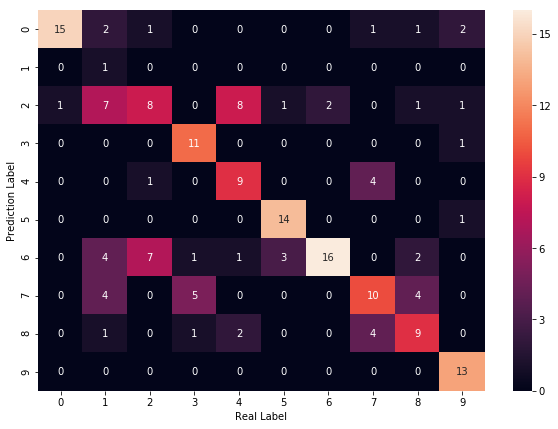

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:1 index:[6] real:5
#1 min_error:2 index:[2 6] real:2
#2 min_error:2 index:[8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:1 index:[2 6] real:1
#5 min_error:2 index:[8] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:1 index:[3] real:3
#8 min_error:1 index:[6] real:2
#9 min_error:2 index:[2 6 7] real:1
#10 min_error:1 index:[7] real:7
#11 min_error:2 index:[2 8] real:4
#12 min_error:1 index:[6] real:6
#13 min_error:0 index:[3] real:3
#14 min_error:2 index:[1] real:1
#15 min_error:2 index:[3] real:3
#16 min_error:2 index:[0 7] real:9
#17 min_error:1 index:[7] real:1
#18 min_error:1 index:[8] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:1 index:[0] real:8
#21 min_error:0 index:[2] real:4
#22 min_error:1 index:[3] real:3
#23 min_error:2 index:[7] real:1
#24 min_error:0 index:[2] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:1 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:1 index:[6] real:6
#29 min_error:1 index:[9] real:9
#30 min_

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.6530612244897959
Avg Base Learner:0.8614718614718615


In [20]:
from random import randint

list_acc = []

for iii in range(11):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1388888888888889
Accuracy on training set: 0.09444444444444444
Accuracy on training set: 0.16666666666666666
Accuracy on training set: 0.2222222222222222
Accuracy on training set: 0.37222222222222223
Accuracy on training set: 0.4777777777777778
Accuracy on training set: 0.49444444444444446
Accuracy on training set: 0.5055555555555555
Accuracy on training set: 0.5611111111111111
Accuracy on training set: 0.5333333333333333
Accuracy on training set: 0.5666666666666667


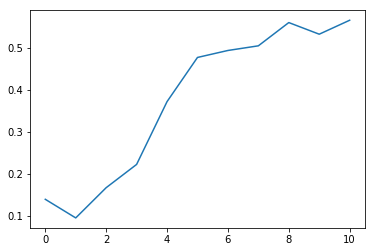

In [21]:
plt.plot(range(11),list_acc)
plt.show()

In [22]:
list_acc

[0.1388888888888889,
 0.09444444444444444,
 0.16666666666666666,
 0.2222222222222222,
 0.37222222222222223,
 0.4777777777777778,
 0.49444444444444446,
 0.5055555555555555,
 0.5611111111111111,
 0.5333333333333333,
 0.5666666666666667]